In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import os
import json

def find_json_file(directory):
    """
    Find a JSON file in a directory (and its subdirectories) and load it into a dictionary.
    
    Parameters:
        directory (str): Path to the directory to search.
    
    Returns:
        dict or None: Dictionary containing the JSON data if a file is found, 
                      None otherwise.
    """
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith('.json'):
                file_path = os.path.join(root, file_name)
                with open(file_path, 'r') as file:
                    try:
                        json_data = json.load(file)
                        return json_data
                    except json.JSONDecodeError:
                        print(f"Error: JSON decode failed for file '{file_path}'")
    print("No JSON file found in the directory.")
    return None

# # Example usage:
# directory_path = '/path/to/directory'  # Replace with the path to your directory
# json_data = find_json_file(directory_path)
# if json_data:
#     print(json_data)


In [7]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import json
# importing data
# Read the 2D array back from the text file
dir_path = r"C:\Users\arpan\OneDrive\Documents\GRB\data\dp04-04-1"          #dp1-1set/dp1-1
event_types = {1:'GRB',2:'TGF',3:'SGR',4:'SFLARE'}
event_counter = {'GRB':0,'TGF':0,'SGR':0,'SFLARE':0}
# Replace 'your_search_string' with the string you are looking for in file names
search_string = 'bn'
search_pattern = os.path.join(dir_path, f'*{search_string}*')
matching_files = glob.glob(search_pattern)
json_data = find_json_file(dir_path)
print(json_data)

{'bin list': [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5], 'time interval': [-10, 50], 'number of data points': 78792, 'data set name': 'dp03-04-1', 'data set path': 'C:\\Users\\arpan\\OneDrive\\Documents\\GRB\\data\\dp03-04-1'}


In [12]:
X_dict1 = {str(key): [] for key in json_data['bin list']}
t = json_data['time interval'][1]-json_data['time interval'][0]
print(t)
print(X_dict1)

Y = []

for file in matching_files:
    event_type , event_name = file.split('\\')[-1].split('_')
    loaded_data = np.loadtxt(file, delimiter='\t').astype(np.int32)
    f = 0
    if event_type not in event_counter.keys():
        continue
    for k in X_dict1.keys():
        X_dict1[k].append(loaded_data[f:f+int(t/float(k))])
#         print(f ,' : ', f+int(t/float(k)))
        f = f + int(t/float(k))
#     print(f)
#     print(len(loaded_data))
    y = [0,0,0,0]
    for key,value in event_types.items():
        if value in file.split('\\')[-1]:
#             print(value, file)
            y[key-1] = 1
            Y.append(y)
            event_counter[value] += 1
            break

skip_keys = []#['0.001','0.005']
X_dict={}
for k in X_dict1.keys():
    if k in skip_keys:
        continue
    X_dict[k] = np.array(X_dict1[k])
    X_dict1[k] = np.array(X_dict1[k])
    X_dict[k] = np.reshape(X_dict1[k],X_dict1[k].shape+tuple([1]))
    print(type(X_dict[k]))
    print(X_dict[k].shape)
Y = np.array(Y)
print(Y.shape)

60
{'0.001': [], '0.005': [], '0.01': [], '0.1': [], '0.5': [], '1': [], '5': []}
<class 'numpy.ndarray'>
(4336, 60000, 1)
<class 'numpy.ndarray'>
(4336, 12000, 1)
<class 'numpy.ndarray'>
(4336, 6000, 1)
<class 'numpy.ndarray'>
(4336, 600, 1)
<class 'numpy.ndarray'>
(4336, 120, 1)
<class 'numpy.ndarray'>
(4336, 60, 1)
<class 'numpy.ndarray'>
(4336, 5, 1)
(4336, 4)


In [13]:
print(X_dict.keys())

dict_keys(['0.001', '0.005', '0.01', '0.1', '0.5', '1', '5'])


In [14]:
print(event_counter)
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train = {str(key): [] for key in X_dict.keys()}
X_test = {str(key): [] for key in  X_dict.keys()}
Y_train = {str(key): [] for key in X_dict.keys()}
Y_test = {str(key): [] for key in  X_dict.keys()}

for k in X_train.keys():
    X_train[k], X_test[k], Y_train[k], Y_test[k] = train_test_split(X_dict[k], Y, test_size = 0.2, random_state=42)

    print("X_train shape",k,np.array(X_train[k]).shape)
    print("X_test shape",k, np.array(X_test[k]).shape)
    print("Y_train shape",  np.array(Y_train[k]).shape)
    print("Y_test shape",   np.array(Y_test[k]).shape)

import numpy as np

def check_same_2d_arrays(dictionary):
    arrays = list(dictionary.values())
    for i in range(1, len(arrays)):
        if not np.array_equal(arrays[i], arrays[0]):
            return False
    return True
print(check_same_2d_arrays(Y_train))
print(check_same_2d_arrays(Y_test))

Y_train = np.array(Y_train[list([k for k in Y_train.keys()])[0]])
Y_test = np.array(Y_test[list([k for k in Y_test.keys()])[0]])

print(Y_train.shape)
print(Y_test.shape)

{'GRB': 1649, 'TGF': 1139, 'SGR': 489, 'SFLARE': 1059}
X_train shape 0.001 (3468, 60000, 1)
X_test shape 0.001 (868, 60000, 1)
Y_train shape (3468, 4)
Y_test shape (868, 4)
X_train shape 0.005 (3468, 12000, 1)
X_test shape 0.005 (868, 12000, 1)
Y_train shape (3468, 4)
Y_test shape (868, 4)
X_train shape 0.01 (3468, 6000, 1)
X_test shape 0.01 (868, 6000, 1)
Y_train shape (3468, 4)
Y_test shape (868, 4)
X_train shape 0.1 (3468, 600, 1)
X_test shape 0.1 (868, 600, 1)
Y_train shape (3468, 4)
Y_test shape (868, 4)
X_train shape 0.5 (3468, 120, 1)
X_test shape 0.5 (868, 120, 1)
Y_train shape (3468, 4)
Y_test shape (868, 4)
X_train shape 1 (3468, 60, 1)
X_test shape 1 (868, 60, 1)
Y_train shape (3468, 4)
Y_test shape (868, 4)
X_train shape 5 (3468, 5, 1)
X_test shape 5 (868, 5, 1)
Y_train shape (3468, 4)
Y_test shape (868, 4)
True
True
(3468, 4)
(868, 4)


In [50]:

from keras.models import Model
from keras.layers import Dense, concatenate,Input, Conv1D,BatchNormalization,Flatten,Dropout, Reshape, Conv2D
import math

def create_input_layers(data_dict):
    """
    Create input layers and Conv1D layers based on the number of entries in the dictionary and the shape of the lists in the dictionary.
    
    Parameters:
        data_dict (dict): Dictionary containing dataset names as keys and dataset lists as values.
    
    Returns:
        list: List of input layers.
        list: List of Conv1D layers.
    """
    input_layers = []
    conv_layers = []
    layer_count = 0
    for dataset_name, dataset_list in data_dict.items():
        
        input_shape = tuple([len(dataset_list[0]),1])  # Assuming all lists have the same length
        
        input_layer = Input(shape=input_shape, name=str(dataset_name))
        
        norm = BatchNormalization()(input_layer)  # Add a BatchNormalization layer after each input layer
        
        filter_size = 64
        kernel_size = 32    
        if input_shape[0] < 64:
                filter_size = 32
                kernel_size = 16
        elif input_shape[0] < 32:
                filter_size = 16
                kernel_size = 8
        
        s = norm.shape[1]
        m = (math.floor(np.log10(abs(s))+1))
        d = 0.1 * (m*2-3 )
        stride = m*2-3
        print('name',dataset_name)
        print('m', m)
        print('dropout',d)
        print('strides',stride)
        
        conv1 = Conv1D(filters = filter_size, kernel_size = kernel_size,strides = stride, activation='selu')(norm)  # Add a Conv1D layer after the Dropout layer
        
        dropout1 = Dropout(d)(conv1)
        
        flat = Flatten()(dropout1)
        
        dense = Dense(64, activation = 'mish')(flat) 
        
        d2 = Dropout(0.75)(dense)
        
        input_layers.append(input_layer)
        
        conv_layers.append(d2)
        
        layer_count = layer_count + 1
        
    return input_layers, conv_layers, layer_count

def build_model(data_dict):
    """
    Build a Keras model using input layers based on the number of entries in the dictionary and the shape of the lists in the dictionary.
    
    Parameters:
        data_dict (dict): Dictionary containing dataset names as keys and dataset lists as values.
    
    Returns:
        keras.models.Model: Keras model.
    """
    input_layers, conv_layers, layer_count = create_input_layers(data_dict)
    
    # Concatenate Conv1D layers
    merged = concatenate(conv_layers, axis = -1)
    
    reshaped = Reshape((len(data_dict), 64, 1))(merged)
    
    # Conv2D layer
    conv2d = Conv2D(64, (layer_count, layer_count ), activation='selu')(reshaped)

    # Flatten
    flattened = Flatten()(conv2d)
    
    # Dropout
    drop = Dropout(0.75)(flattened)
    
    # Add dense layers
    output = Dense(4, activation='softmax')(drop)  # Example output layer
    
    # Create the model
    model = Model(inputs=input_layers, outputs=output)
    
    return model

# Build the model
model = build_model(X_train)

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



name 0.001
m 6
dropout 0.9
strides 9
name 0.005
m 5
dropout 0.7000000000000001
strides 7
name 0.01
m 5
dropout 0.7000000000000001
strides 7
name 0.1
m 4
dropout 0.5
strides 5
name 0.5
m 3
dropout 0.30000000000000004
strides 3
name 1
m 3
dropout 0.30000000000000004
strides 3
name 5
m 2
dropout 0.1
strides 1


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 0.001 (InputLayer)  │ (None, 150000, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 0.005 (InputLayer)  │ (None, 30000, 1)  │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 0.01 (InputLayer)   │ (None, 15000, 1)  │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 0.1 (InputLayer)    │ (None, 1500, 1)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 0.5 (InputLayer)    │ (None, 300, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1 (InputLayer)      │ (None, 150, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 5 (InputLayer)      │ (None, 23, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150000, 1) │          4 │ 0.001[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30000, 1)  │          4 │ 0.005[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15000, 1)  │          4 │ 0.01[0][0]        │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1500, 1)   │          4 │ 0.1[0][0]         │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 300, 1)    │          4 │ 0.5[0][0]         │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 1)    │          4 │ 1[0][0]           │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 23, 1)     │          4 │ 5[0][0]           │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_32 (Conv1D)  │ (None, 16664, 64) │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_33 (Conv1D)  │ (None, 4282, 64)  │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, 2139, 64)  │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 294, 64)   │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, 90, 64)    │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_37 (Conv1D)  │ (None, 40, 64)    │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 8, 32)     │        544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 96,340,992 (367.51 MB)

 Trainable params: 96,340,978 (367.51 MB)

 Non-trainable params: 14 (56.00 B)

In [51]:
from keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import Callback

class CustomEarlyStopping(Callback):
    def __init__(self, threshold=0.85, patience=2):
        super(CustomEarlyStopping, self).__init__()
        self.threshold = threshold
        self.patience = patience
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get('accuracy')
        if current is None:
            return

        if current >= self.threshold:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
        else:
            self.wait = 0

custom_early_stopping = CustomEarlyStopping()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2000)

# Train the model
model.fit(X_train, Y_train, epochs=3500, batch_size=128, validation_split=0.3, callbacks=[custom_early_stopping,early_stopping])

Epoch 1/3500


W0000 00:00:1712084508.892993     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712084508.895255     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.3067 - loss: 2.7012

W0000 00:00:1712084539.133362     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3102 - loss: 2.6650   

W0000 00:00:1712084541.035923     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.3131 - loss: 2.6353 - val_accuracy: 0.2434 - val_loss: 11.1341
Epoch 2/3500


W0000 00:00:1712084541.785197     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.4046 - loss: 1.4167 - val_accuracy: 0.2453 - val_loss: 10.4687
Epoch 3/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.4315 - loss: 1.2256 - val_accuracy: 0.2434 - val_loss: 5.9720
Epoch 4/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.4308 - loss: 1.3130 - val_accuracy: 0.2434 - val_loss: 3.3442
Epoch 5/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.4068 - loss: 1.2532 - val_accuracy: 0.2434 - val_loss: 2.4790
Epoch 6/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.4525 - loss: 1.2858 - val_accuracy: 0.2434 - val_loss: 2.5785
Epoch 7/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - accuracy: 0.4434 - loss: 1.1363 - val_accuracy: 0.2792 - val_loss: 1.3623
Epoch 8/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 404ms/step - accuracy: 0.4519 - loss: 1.1390 - val_accuracy: 0.2453 - val_loss: 1.5540
Epoch 9/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.4621 - loss: 1.1033 - val_accuracy

In [15]:
# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(X_train, Y_train,verbose=2)
print(f'\nTest accuracy on training data: {test_acc} \n \n')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f'\nTest accuracy on test data: {test_acc}\n \n')

# Evaluate the model on the all data
test_loss, test_acc = model.evaluate(X_dict, Y, verbose=2)
print(f'\nTest accuracy on all data: {test_acc}\n \n')

109/109 - 14s - 124ms/step - accuracy: 0.8861 - loss: 0.4117

Test accuracy on training data: 0.886101484298706 
 

28/28 - 3s - 120ms/step - accuracy: 0.8871 - loss: 0.3547

Test accuracy on test data: 0.8870967626571655
 

136/136 - 15s - 113ms/step - accuracy: 0.8863 - loss: 0.4017

Test accuracy on all data: 0.8863007426261902
 



In [54]:
# saving the model 
model.save('/kaggle/working/m02-04-2.keras')  

In [55]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink('m02-04-2.keras')

/kaggle/working


/kaggle/working/m02-04-2.keras

In [2]:
import tensorflow as tf
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.15.0
Keras version: 3.0.4


In [1]:
from keras.models import load_model
import keras
# import h5py

# Load the model
lmodel = load_model(r"C:\Users\arpan\OneDrive\Documents\GRB\models\m05-04-1\m05-04-1.keras")

# Verify the model's architecture
lmodel.summary()


c:\Users\arpan\miniconda3\lib\site-packages\keras\src\saving\saving_lib.py:394: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 48 variables whereas the saved optimizer has 94 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ 0.001 (InputLayer)  │ (None, 60000, 1)  │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ 0.005 (InputLayer)  │ (None, 12000, 1)  │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ 0.01 (InputLayer)   │ (None, 6000, 1)   │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ 0.1 (InputLayer)    │ (None, 600, 1)    │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ 0.5 (InputLayer)    │ (None, 120, 1)    │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ 1 (InputLayer)      │ (None, 60, 1)     │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ 5 (InputLayer)      │ (None, 5, 1)      │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 60000, 1)  │       4 │ 0.001[0][0]          │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 12000, 1)  │       4 │ 0.005[0][0]          │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 6000, 1)   │       4 │ 0.01[0][0]           │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 600, 1)    │       4 │ 0.1[0][0]            │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 120, 1)    │       4 │ 0.5[0][0]            │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 60, 1)     │       4 │ 1[0][0]              │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 5, 1)      │       4 │ 5[0][0]              │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 8567, 64)  │   2,112 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 1710, 64)  │   2,112 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 1194, 64)  │   2,112 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 190, 64)   │   2,112 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 30, 64)    │   2,112 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_27 (Conv1D)  │ (None, 45, 32)    │     544 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_28 (Conv1D)  │ (None, 4, 4)      │      12 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼────────────────────

 Total params: 96,018,316 (366.28 MB)

 Trainable params: 48,009,150 (183.14 MB)

 Non-trainable params: 14 (56.00 B)

 Optimizer params: 48,009,152 (183.14 MB)

In [2]:
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)


3.0.4
2.15.0


In [23]:
import os
import json

def find_json_file(directory):
    """
    Find a JSON file in a directory (and its subdirectories) and load it into a dictionary.
    
    Parameters:
        directory (str): Path to the directory to search.
    
    Returns:
        dict or None: Dictionary containing the JSON data if a file is found, 
                      None otherwise.
    """
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith('.json'):
                file_path = os.path.join(root, file_name)
                with open(file_path, 'r') as file:
                    try:
                        json_data = json.load(file)
                        return json_data
                    except json.JSONDecodeError:
                        print(f"Error: JSON decode failed for file '{file_path}'")
    print("No JSON file found in the directory.")
    return None

# # Example usage:
# directory_path = '/path/to/directory'  # Replace with the path to your directory
# json_data = find_json_file(directory_path)
# if json_data:
#     print(json_data)

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import json
# importing data
# Read the 2D array back from the text file
dir_path = r"C:\Users\arpan\OneDrive\Documents\GRB\data\dp19-04-1"         #dp1-1set/dp1-1
event_types = {1:'GRB',2:'TGF',3:'SGR',4:'SFLARE'}
event_counter = {'GRB':0,'TGF':0,'SGR':0,'SFLARE':0}
# Replace 'your_search_string' with the string you are looking for in file names
search_string = 'bn'
search_pattern = os.path.join(dir_path, f'*{search_string}*')
matching_files = glob.glob(search_pattern)
json_data = find_json_file(dir_path)
print(json_data)

X_dict1 = {str(key): [] for key in json_data['bin list']}
t = json_data['time interval'][1]-json_data['time interval'][0]
print(t)
print(X_dict1)

Y = []

for file in matching_files:
    event_type , event_name = file.split('\\')[-1].split('_')
    loaded_data = np.loadtxt(file, delimiter='\t').astype(np.int32)
    
    if event_type not in event_counter.keys():
        continue
    
    if event_counter[event_type] > 900:
        continue
    
    y = [0,0,0,0]
    
    for key,value in event_types.items():
        if value in file.split('\\')[-1]:
            y[key-1] = 1
            Y.append(y)
            event_counter[value] += 1
            sgrf = 1 if key == 3 else 0
            if sgrf == 1:
                Y.append(y)
                event_counter[value] += 1
            break
    
    f = 0
    for k in X_dict1.keys():
        X_dict1[k].append(loaded_data[f:f+int(t/float(k))])
        f = f + int(t/float(k))
    if sgrf == 1:
        f = 0
        for k in X_dict1.keys():
            X_dict1[k].append(loaded_data[f:f+int(t/float(k))])
            f = f + int(t/float(k))

skip_keys = []#['0.001','0.005']
X_dict={}
for k in X_dict1.keys():
    if k in skip_keys:
        continue
    X_dict[k] = np.array(X_dict1[k])
    X_dict1[k] = np.array(X_dict1[k])
    X_dict[k] = np.reshape(X_dict1[k],X_dict1[k].shape+tuple([1]))
    print(type(X_dict[k]))
    print(X_dict[k].shape)
Y = np.array(Y)
print(Y.shape)

print(event_counter)

# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train = {str(key): [] for key in X_dict.keys()}
X_test = {str(key): [] for key in  X_dict.keys()}
Y_train = {str(key): [] for key in X_dict.keys()}
Y_test = {str(key): [] for key in  X_dict.keys()}

for k in X_train.keys():
    X_train[k], X_test[k], Y_train[k], Y_test[k] = train_test_split(X_dict[k], Y, test_size = 0.2, random_state=42)

    print("X_train shape",k,np.array(X_train[k]).shape)
    print("X_test shape",k, np.array(X_test[k]).shape)
    print("Y_train shape",  np.array(Y_train[k]).shape)
    print("Y_test shape",   np.array(Y_test[k]).shape)

import numpy as np

def check_same_2d_arrays(dictionary):
    arrays = list(dictionary.values())
    for i in range(1, len(arrays)):
        if not np.array_equal(arrays[i], arrays[0]):
            return False
    return True
print(check_same_2d_arrays(Y_train))
print(check_same_2d_arrays(Y_test))

Y_train = np.array(Y_train[list([k for k in Y_train.keys()])[0]])
Y_test = np.array(Y_test[list([k for k in Y_test.keys()])[0]])

print(Y_train.shape)
print(Y_test.shape)

{'bin list': [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5], 'time interval': [-10, 50], 'number of data points': 78792, 'data set name': 'dp03-04-1', 'data set path': 'C:\\Users\\arpan\\OneDrive\\Documents\\GRB\\data\\dp03-04-1'}
60
{'0.001': [], '0.005': [], '0.01': [], '0.1': [], '0.5': [], '1': [], '5': []}
<class 'numpy.ndarray'>
(3605, 60000, 1)
<class 'numpy.ndarray'>
(3605, 12000, 1)
<class 'numpy.ndarray'>
(3605, 6000, 1)
<class 'numpy.ndarray'>
(3605, 600, 1)
<class 'numpy.ndarray'>
(3605, 120, 1)
<class 'numpy.ndarray'>
(3605, 60, 1)
<class 'numpy.ndarray'>
(3605, 5, 1)
(3605, 4)
{'GRB': 901, 'TGF': 901, 'SGR': 902, 'SFLARE': 901}
X_train shape 0.001 (2884, 60000, 1)
X_test shape 0.001 (721, 60000, 1)
Y_train shape (2884, 4)
Y_test shape (721, 4)
X_train shape 0.005 (2884, 12000, 1)
X_test shape 0.005 (721, 12000, 1)
Y_train shape (2884, 4)
Y_test shape (721, 4)
X_train shape 0.01 (2884, 6000, 1)
X_test shape 0.01 (721, 6000, 1)
Y_train shape (2884, 4)
Y_test shape (721, 4)
X_train sh

In [24]:
X = X_dict

113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step


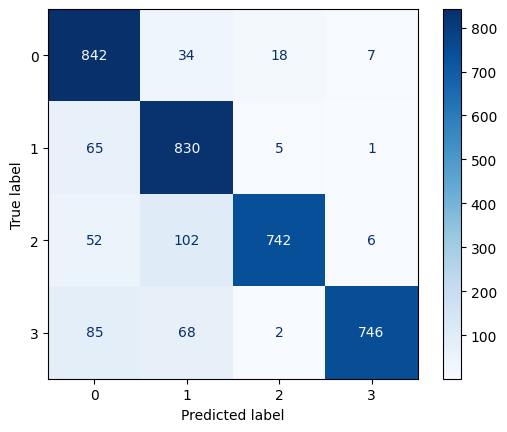

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_prediction = lmodel.predict(X)
test_predicted_label = np.argmax(test_prediction, axis=1)
test_actual_label = np.argmax(Y, axis = 1)
conf_m = confusion_matrix(test_actual_label, test_predicted_label)

conf_m_show = ConfusionMatrixDisplay(confusion_matrix = conf_m)
conf_m_show.plot(include_values=True, cmap='Blues',ax = None, xticks_rotation= 'horizontal')

In [5]:
import random

n = len(X_test['1'])
print(n)
# Generate a random integer
num = random.randint(1, n-1)
print(num)
x = {}
for key in X_dict.keys():
    arr = X_test[key][num]
#     print(arr.shape)
    arr = arr.reshape(1,arr.shape[0],arr.shape[-1])
#     print(arr.shape)
    x[key] = arr
y = Y_test[num]

# Assuming my_model is your model and my_test_input_dict is your test input dictionary
y_pred = lmodel.predict(x, verbose =2)

print(y_pred[0])
y_pred_arr = np.array([1 if i == max(y_pred[0]) else 0 for i in y_pred[0]])
print(y_pred_arr)
print(y)
print(event_types)

868
546
<class 'dict'>
1/1 - 1s - 918ms/step
[0.09222221 0.62979066 0.23475967 0.04322749]
[0 1 0 0]
[0 0 1 0]
{1: 'GRB', 2: 'TGF', 3: 'SGR', 4: 'SFLARE'}


In [18]:
def model_conf(model,X,Y,conf_threshold = 0.7):
    conf_right = []
    conf_wrong = []

    for n in range(len(Y)):
        try:
            x = {}
            for key in X.keys():
                arr = X[key][n]
                arr = arr.reshape(1,arr.shape[0],arr.shape[-1])
                x[key] = arr
        except:
            x = X[n]
        y = Y[n].tolist()

        y_pred = model.predict(x, verbose = 0).tolist()[0]
        
        max_value = y_pred[0]
        max_index = 0

        for i, value in enumerate(y_pred):
            if value > max_value:
                max_value = value
                max_index = i

        if y.index(max(y)) == max_index and max_value > conf_threshold:
            conf_right.append(max_value)
        else:
            conf_wrong.append(max_value)            


    return len(conf_right)/(len(conf_right) + len(conf_wrong)), conf_right, conf_wrong

a,r,w = model_conf(lmodel,X_dict,Y,0)

print(a)
print('average conf when right',sum(r)/len(r))
print('average conf when wrong',sum(w)/len(w))

0.8863007380073801
average conf when right 0.8781560446302189
average conf when wrong 0.6572455979022245


In [9]:
def model_conf_c(model,X,Y,conf_threshold = 0.7):
    conf=[]
    a = 0
    uncert = 0
    ua = 0

    for n in range(len(Y)):
        
        try:
            x = {}
            for key in X.keys():
                arr = X[key][n]
                arr = arr.reshape(1,arr.shape[0],arr.shape[-1])
                x[key] = arr
        except:
            x = X[n]

        y = Y[n].tolist()

        y_pred = model.predict(x, verbose = 0).tolist()[0]

        max_value = y_pred[0]
        max_index = 0

        for i, value in enumerate(y_pred):
            if value > max_value:
                max_value = value
                max_index = i

        if y.index(max(y)) == max_index:
            conf.append(max_value)
            ua = ua+1
            if max_value > conf_threshold:
                a = a+1
            else:
                uncert = uncert+1
        else:
            conf.append(-max_value)

    print('uncertain ratio when correct', uncert/len(Y))
    print('accuracy disregarding uncertainity', ua/(len(Y)))    

    for i in range(len(y_pred)):
        class_conf = []
        for j in range(len(Y)):
            if conf[j] > 0 and Y[j][i] == 1:
                class_conf.append(conf[j])
        print("confidence of class",i+1 , event_types[i+1])
        print(sum(class_conf)/len(class_conf))

    return a/(len(Y)), [i if i > 0 else 0 for i in conf], [-i if i < 0 else 0 for i in conf]

a,r,w = model_conf_c(lmodel,X,Y,0.7)

uncertain % 12.061808118081181
confidence of class 1 GRB
0.8739498782929757
confidence of class 2 TGF
0.7771464200345056
confidence of class 3 SGR
0.9295235892335079
confidence of class 4 SFLARE
0.9824953360841908
accuracy disregarding uncertainity 0.8863007380073801


In [10]:
print(event_types)
print('accuracy with conf above threshold',a)
print('average conf when right',sum(r)/(len(r)-r.count(0)))
print('average conf when wrong',sum(w)/(len(w)-w.count(0)))

{1: 'GRB', 2: 'TGF', 3: 'SGR', 4: 'SFLARE'}
0.7656826568265682
average conf when right 0.8781560446302189
average conf when wrong 0.6572455979022245

Test accuracy on test data: 0.8871
 



In [4]:
def model_conf_u(model,X,Y,conf_threshold = 0.7):
    conf=[]
    a = 0
    w = 0
    uncert = 0

    for n in range(len(Y)):
        
        try:
            x = {}
            for key in X.keys():
                arr = X[key][n]
                arr = arr.reshape(1,arr.shape[0],arr.shape[-1])
                x[key] = arr
        except:
            x = X[n]

        y = Y[n].tolist()

        y_pred = model.predict(x, verbose = 0).tolist()[0]

        max_value = y_pred[0]
        max_index = 0

        for i, value in enumerate(y_pred):
            if value > max_value:
                max_value = value
                max_index = i

        if max_value > conf_threshold:
            if y.index(max(y)) == max_index:
                conf.append(max_value)
                a = a+1
            else:
                w = w+1
        else:
            uncert = uncert+1
    
    print('confidently right', a/len(Y))
    print('confidently wrong', w/len(Y))
    print('uncertain', uncert/len(Y))

model_conf_u(lmodel,X,Y,0.7)

confidently right 0.7656826568265682
confidently wrong 0.04451107011070111
uncertain 0.18980627306273062


In [2]:
print(0.7656826568265682/(0.7656826568265682+0.04451107011070111))

0.9450612012524907
